Import packages

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Define parameters with nM concentrations

In [2]:
VRmax = 20 

def a1m(ligand):
    return (ligand / (1 + ligand))

def a1p(ligand):
    return (1 / (1 + ligand))

abp = .1
dbp = 0.01
kbp = 1

ab = 1
db = 1
kb = 0

def beta1(ligand):
    return (2.5*ligand / (1+ligand))
k1p = 1
k1m = 1

Define the set of coupled ODEs to solve

In [3]:
def odes(x,t):
    
    E0 = x[0]
    E1 = x[1]
    E1Star = x[2]
    B = x[3]
    Bp = x[4]
    E1StarB = x[5]
    E1StarBp = x[6]
    
    E0 = -E1-E1Star-E1StarB-E1StarBp+10000
    B = -Bp-E1StarB-E1StarBp+2000
    
    dE0dt = -VRmax + E1StarBp*kbp + E1StarB*kb
    dE1dt = VRmax + E1Star*a1m(ligand) - E1*a1p(ligand) + E1StarBp*beta1(ligand) + E1StarB*beta1(ligand)
    dE1Stardt = E1*a1p(ligand) - E1Star*a1m(ligand) - E1Star*Bp*abp + E1StarBp*dbp - E1Star*B*ab + E1StarB*db
    dBdt = -E1Star*B*ab + E1StarB*db + E1StarB*kb + E1StarB*beta1(ligand) - B*k1p*E1Star + Bp*k1m
    dBpdt = -E1Star*Bp*abp + E1StarBp*dbp + E1StarBp*kbp + E1StarBp*beta1(ligand) + B*k1p*E1Star - Bp*k1m
    dE1StarBdt = E1Star*B*ab - E1StarB*db - E1StarB*kb - E1StarB*beta1(ligand)
    dE1StarBpdt = E1Star*Bp*abp - E1StarBp*dbp - E1StarBp*kbp - E1StarBp*beta1(ligand) 
    
    return [dE0dt, dE1dt, dE1Stardt, dBdt, dBpdt, dE1StarBdt, dE1StarBpdt]

solve steady state

In [4]:
import sympy
from sympy.solvers import solve
from sympy import Symbol

In [5]:
E0, E1, E1Star, B, Bp, E1StarB, E1StarBp,ligand = sympy.symbols('E0, E1, E1Star, B, Bp, E1StarB, E1StarBp,ligand')
eq1 = sympy.Eq(-VRmax + E1StarBp*kbp + E1StarB*kb,0)
eq2 = sympy.Eq(VRmax + E1Star*a1m(ligand) - E1*a1p(ligand) + E1StarBp*beta1(ligand) + E1StarB*beta1(ligand),0)
eq3 = sympy.Eq(E1*a1p(ligand) - E1Star*a1m(ligand) - E1Star*Bp*abp + E1StarBp*dbp - E1Star*B*ab + E1StarB*db,0)
eq4 = sympy.Eq(-E1Star*B*ab + E1StarB*db + E1StarB*kb + E1StarB*beta1(ligand) - B*k1p*E1Star + Bp*k1m,0)
eq5 = sympy.Eq(-E1Star*Bp*abp + E1StarBp*dbp + E1StarBp*kbp + E1StarBp*beta1(ligand) + B*k1p*E1Star - Bp*k1m,0)
eq6 = sympy.Eq(E1Star*B*ab - E1StarB*db - E1StarB*kb - E1StarB*beta1(ligand),0)
eq7 = sympy.Eq(E1Star*Bp*abp - E1StarBp*dbp - E1StarBp*kbp - E1StarBp*beta1(ligand),0)

#add additional contstraints
eq8 = sympy.Eq(E0+E1+E1Star+E1StarB+E1StarBp-10000,0)
eq9 = sympy.Eq(B+Bp+E1StarB+E1StarBp-2000,0)

list = sympy.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9],(E0, E1, E1Star, B, Bp, E1StarB, E1StarBp))

In [6]:
t = list[0]

In [7]:
s=sympy.lambdify(ligand,t)

In [37]:
s(0)

(9497.66208149833,
 20.0,
 0.43732353281255304,
 1056.19881006229,
 461.900594968855,
 461.9005949688558,
 20.0)

Choose initial conditions to be the steady state values at ligand = 0, then plot the active receptor concentration over the steady state active receptor concentration for the chosen ligand concentration

In [54]:
x0 = s(0)
ligand = 0.01
t = np.linspace(0,100,100000)
sol = odeint(odes,x0,t)

Text(0, 0.5, 'Active receptor E1Star')

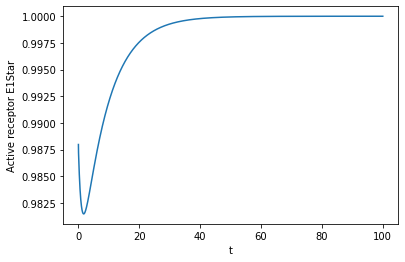

In [55]:
E1Starnorm = sol[:,2]/s(0.01)[2]
plt.plot(t,E1Starnorm)
plt.xlabel('t')
plt.ylabel('Active receptor E1Star')

Plot the gain curve in the I total >> A steady state limit

In [16]:
def g(ligand):
    return (beta1(ligand)/a1m(ligand))*2000/s(ligand)[2]

Text(0, 0.5, 'gain')

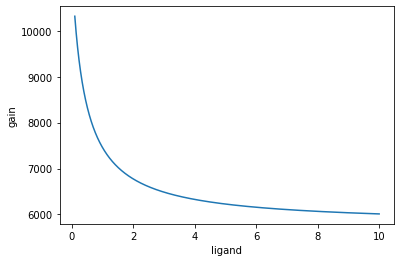

In [22]:
x = np.linspace(0.1,10,100000)
plt.plot(x,g(x))
plt.xlabel('ligand')
plt.ylabel('gain')

Plot response curves for additional ligand concentrations

Text(0, 0.5, 'Active receptor E1Star')

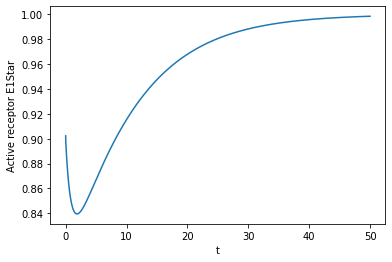

In [56]:
ligand = 0.1
x0 = s(0)
t = np.linspace(0,50,100000)
sol = odeint(odes,x0,t)
E1Starnorm = sol[:,2]/s(0.1)[2]
plt.plot(t,E1Starnorm)
plt.xlabel('t')
plt.ylabel('Active receptor E1Star')

Text(0, 0.5, 'Active receptor E1Star')

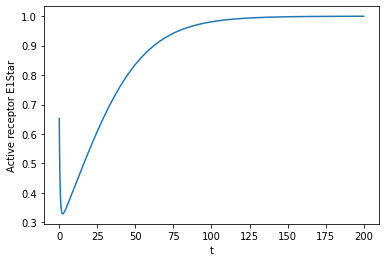

In [57]:
ligand = 1
x0 = s(0)
t = np.linspace(0,200,100000)
sol = odeint(odes,x0,t)
E1Starnorm = sol[:,2]/s(1)[2]
plt.plot(t,E1Starnorm)
plt.xlabel('t')
plt.ylabel('Active receptor E1Star')

Text(0, 0.5, 'Active receptor E1Star')

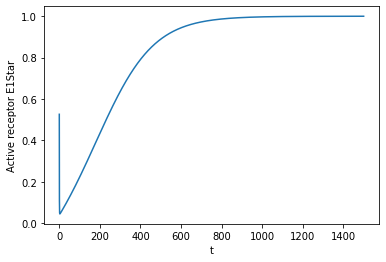

In [58]:
ligand = 10
x0 = s(0)
t = np.linspace(0,1500,100000)
sol = odeint(odes,x0,t)
E1Starnorm = sol[:,2]/s(10)[2]
plt.plot(t,E1Starnorm)
plt.xlabel('t')
plt.ylabel('Active receptor E1Star')

The two state model responds more strongly to higher ligand concentrations, and receptor activity decreases and recovers over a timescale that increases with ligand concentration. Unlike the three state model, receptor acivity does not overshoot above the steady state when recovering.